In [54]:
%matplotlib inline

In [55]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import root_pandas
import pandas as pd
import uproot
import numpy as np
from scipy import stats

In [60]:
file = uproot.open("dataUpsilon4SWithBkg/Upsilon4S_seed374230740.root")
tree = file["tree"]

In [61]:
TPCSimHits = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z"]})
TPCSimHits['r']=np.sqrt(TPCSimHits['m_x']**2+TPCSimHits['m_y']**2)
TPCSimHits

,m_pdg,m_x,m_y,m_z,r
0,11,-3.489667,-57.821105,5.525880,57.926315
1,11,-3.489232,-57.819564,5.529987,57.924750
2,11,-3.490774,-57.825032,5.515419,57.930302
3,11,-3.491554,-57.827801,5.508044,57.933112
4,11,-3.491028,-57.825936,5.513011,57.931219
...,...,...,...,...,...
10104684,11,-42.731913,-18.789645,40.892510,46.680480
10104685,11,-42.731540,-18.791204,40.892003,46.680766
10104686,11,-42.731689,-18.790584,40.892205,46.680652
10104687,11,-42.731856,-18.789885,40.892432,46.680524


In [70]:
TPCTrackInfos = pd.DataFrame({subbranch: tree[f"TPCTrackInfos.{subbranch}"].array().content for subbranch in ["m_pdg", "m_momentum_x", "m_momentum_y", "m_momentum_z"]})
TPCTrackInfos["mom_mag"] = np.sqrt(TPCTrackInfos['m_momentum_x']**2+TPCTrackInfos['m_momentum_y']**2 + TPCTrackInfos['m_momentum_z']**2)
TPCElecInfos = TPCTrackInfos[TPCTrackInfos["m_pdg"]==11]
TPCElecInfos

,m_pdg,m_momentum_x,m_momentum_y,m_momentum_z,mom_mag
1,11,0.053903,0.011962,-0.004059,0.055363
2,11,0.028303,0.016221,-0.004672,0.032955
3,11,-0.026198,-0.011611,0.019828,0.034847
4,11,0.065408,0.015984,0.015895,0.069183
5,11,-0.003534,0.003098,-0.037484,0.037777
...,...,...,...,...,...
116,11,-0.030603,0.003085,0.010084,0.032369
117,11,-0.002930,-0.042741,-0.021272,0.047832
118,11,0.006796,-0.034006,0.008677,0.035748
119,11,-0.017842,0.038573,-0.007606,0.043175


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  3.,  2.,  6.,  8., 18., 17.,
        24.,  9., 16.,  5.,  0.,  2.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.52497242, -0.51162226, -0.4982721 , -0.48492193, -0.47157177,
        -0.45822161, -0.44487145, -0.43152129, -0.41817112, -0.40482096,
        -0.3914708 , -0.37812064, -0.36477048, -0.35142031, -0.33807015,
        -0.32471999, -0.31136983, -0.29801966, -0.2846695 , -0.27131934,
        -0.25796918, -0.24461902, -0.23126885, -0.21791869, -0.20456853,
        -0.19121837, -0.17786821, -0.16451804, -0.15116788, -0.13781772,
        -0.12446756, -0.11111739, -0.09776723, -0.08441707, -0.07106691,
        -0.05771675, -0.04436658, -0.03101642, -0.01766626, -0.0043161 ,
         0.00903406,  0.02238423,  0.03573439,  0.04908455,  0.06243471,
         0.07578488,  0.08913504,  0.1024852 ,  0.11583536,

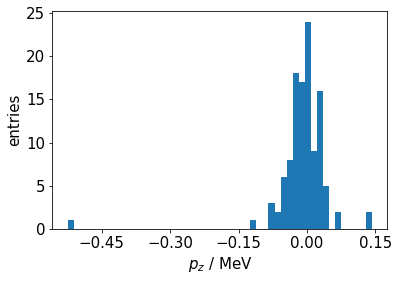

In [80]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$p_z$ / MeV', fontsize=15)
ax.set_ylabel('entries', fontsize=15)
ax.tick_params(labelsize=15)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.hist(TPCElecInfos["m_momentum_z"], bins=50)


In [72]:
TPCElectronSimHits = TPCSimHits[TPCSimHits['m_pdg']==11]
TPCElectronSimHits

,m_pdg,m_x,m_y,m_z,r
0,11,-3.489667,-57.821105,5.525880,57.926315
1,11,-3.489232,-57.819564,5.529987,57.924750
2,11,-3.490774,-57.825032,5.515419,57.930302
3,11,-3.491554,-57.827801,5.508044,57.933112
4,11,-3.491028,-57.825936,5.513011,57.931219
...,...,...,...,...,...
10104684,11,-42.731913,-18.789645,40.892510,46.680480
10104685,11,-42.731540,-18.791204,40.892003,46.680766
10104686,11,-42.731689,-18.790584,40.892205,46.680652
10104687,11,-42.731856,-18.789885,40.892432,46.680524


In [39]:
TPCDigits = pd.DataFrame({subbranch: tree[f"TPCDigits.{subbranch}"].array().content for subbranch in ["m_xReal", "m_yReal", "m_zReal", "m_useDigitInTracking", "m_xReco", "m_yReco", "m_zReco"]})
TPCDigits = TPCDigits[TPCDigits['m_useDigitInTracking']==True]
TPCDigits['cellID'] = ((TPCDigits['m_xReal']+128)/2).astype(int) + 128*((TPCDigits['m_yReal']+128)/2).astype(int)
TPCDigits

KeyError: not found: b'TPCDigits.m_xReal'
 in file: dataUpsilon4SWithBkg/Upsilon4S_seed141596408.root

In [ ]:
counts = (TPCDigits['cellID'].value_counts())
#for row in counts:
#    print(row)
counts
#len(TPCDigits[TPCDigits['cellID']==10528])

In [40]:
counts.index[counts > 5000].tolist()

[6178,
 6002,
 4383,
 10385,
 7009,
 9769,
 13141,
 9369,
 4424,
 8676,
 10936,
 4934,
 9824,
 11317,
 12134,
 10144,
 7909,
 5432,
 6510,
 5062,
 4907,
 10593,
 7526,
 11445,
 10513,
 8805,
 10937,
 6311,
 6050,
 8154,
 4153,
 3656,
 6177,
 12969,
 13354,
 13142,
 8353,
 6675,
 13388,
 9509,
 3615,
 3925,
 7707,
 11158,
 5081,
 10538,
 10465,
 7200,
 11286,
 7579,
 6306,
 15173,
 8614,
 12967,
 5315,
 9870,
 3652,
 9454,
 8845,
 5556,
 14902,
 13504,
 4625,
 11463,
 14153,
 4790,
 8281,
 12072,
 8465,
 6558,
 10327,
 3664,
 6130,
 3040,
 12240,
 3271,
 4309,
 11115,
 9515,
 10573,
 10447,
 6870,
 5416,
 12568,
 5285,
 6700,
 9366,
 2860,
 7403,
 3516,
 13232,
 11331,
 10581,
 10330,
 13735,
 3376,
 10952,
 11583,
 12180,
 9625,
 11194,
 3273,
 10287,
 13493,
 3144,
 7259,
 5855,
 8981,
 9758,
 14638,
 10074,
 1835,
 3265,
 7917,
 12102,
 3400,
 12341,
 10147,
 5172,
 3259,
 9751,
 12191,
 8674,
 12845,
 3653,
 11446,
 11926,
 14417,
 13264,
 7057,
 9323,
 4554,
 10384,
 13374,
 12359,

In [41]:
def plot_xyprojection(xdata, ydata, hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', xlimlow=0.0, xlimup=0.0, ylimlow=0.0, ylimup=0.0, legendloc=2):
    fig, ax = plt.subplots()
    x = xdata
    y = ydata
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75)
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$x$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if xlimlow and xlimup:
        ax.set_xlim(xlimlow, xlimup)
    if ylimlow and ylimup:
        ax.set_ylim(ylimlow, ylimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccircle = ax.add_artist(circle1)
    ax.add_artist(circle2)
    
    fig.set_size_inches(10, 10)
    plt.title('Readout plane projection', fontsize=25)
    lgnd = plt.legend(handles=[tpchits, tpccircle],loc=legendloc, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

In [42]:
def plot_sideprojection(zdata, sidedata, sidename,hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', zlimlow=0.0, zlimup=0.0, sidelimlow=0.0, sidelimup=0.0):
    fig, ax = plt.subplots()
    x = zdata
    y = sidedata
    
    rect1 = plt.Rectangle((-83.12,44.85), 241.69, 64.55 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    rect2 = plt.Rectangle((-83.12,-109.4), 241.69, 64.55 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--')
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$'+sidename+'$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if zlimlow and zlimup:
        ax.set_xlim(zlimlow, zlimup)
    if sidelimlow and sidelimup:
        ax.set_ylim(sidelimlow, sidelimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    ax.add_artist(rect2)
    
    fig.set_size_inches(10, 10)
    plt.title('Side View of TPC Volume', fontsize=25)
    lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

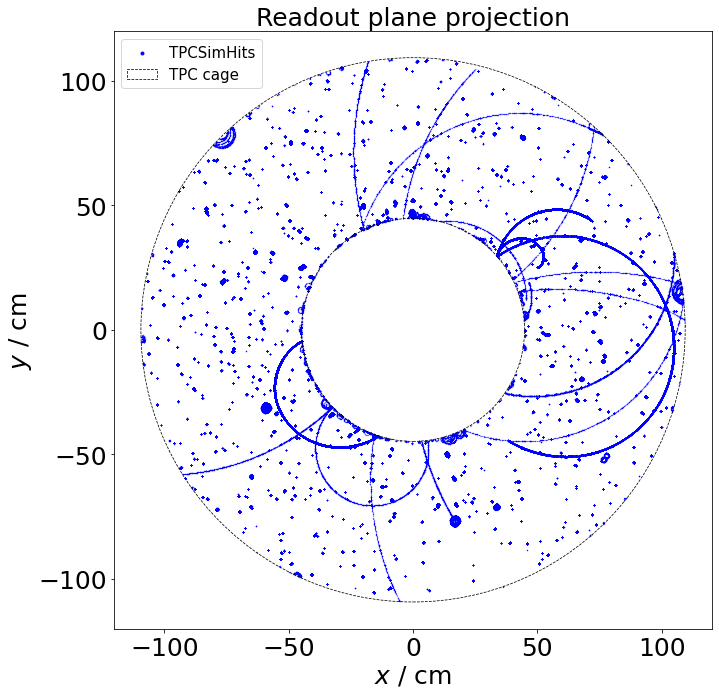

In [11]:
plot_xyprojection(TPCSimHits['m_x'], TPCSimHits['m_y'], hitcolor='blue', hitlabel='TPCSimHits', savebool=False, savename='UpsisForPeter.pdf')

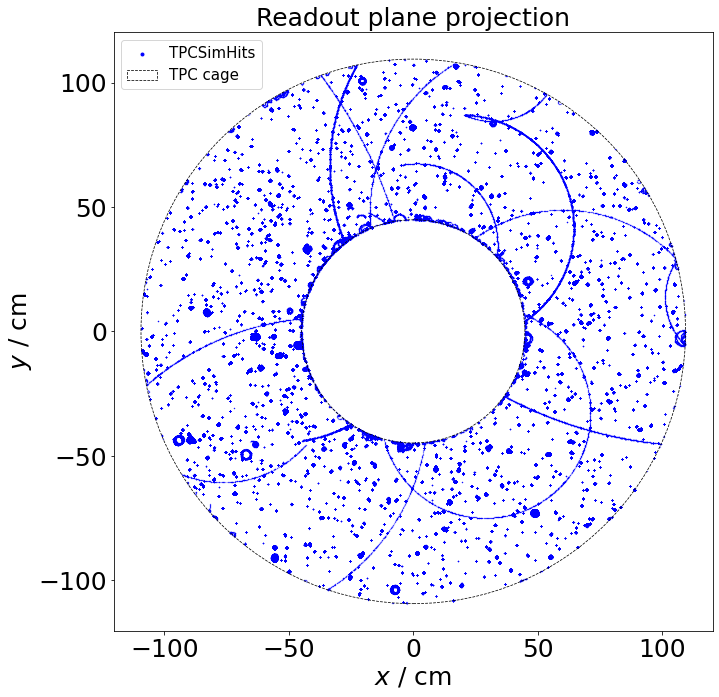

In [47]:
plot_xyprojection(TPCSimHits['m_x'], TPCSimHits['m_y'], hitcolor='blue', hitlabel='TPCSimHits', savebool=False, savename='UpsisForPeter.pdf')

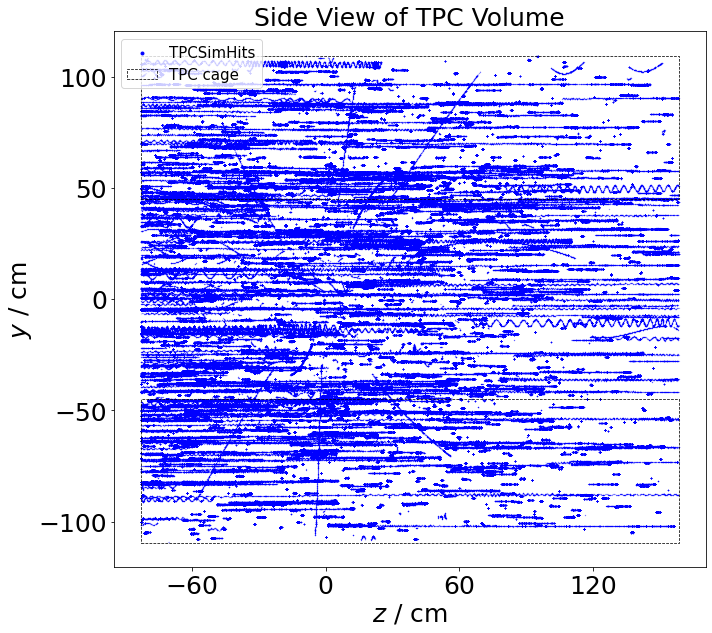

In [51]:
plot_sideprojection(TPCSimHits['m_z'], TPCSimHits['m_y'], 'y', hitcolor='blue', hitlabel='TPCSimHits', savebool=False, savename='UpsisForPeter_sideview.pdf')

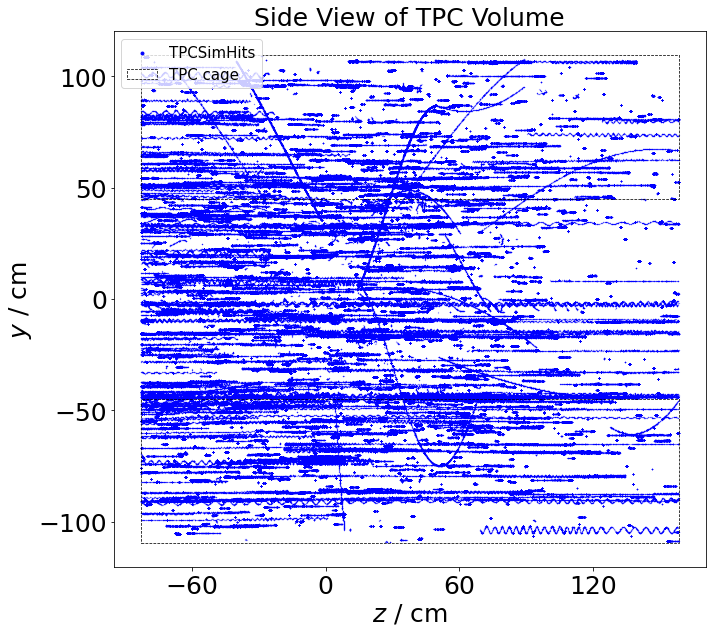

In [48]:
plot_sideprojection(TPCSimHits['m_z'], TPCSimHits['m_y'], 'y', hitcolor='blue', hitlabel='TPCSimHits', savebool=False, savename='UpsisForPeter_sideview.pdf')

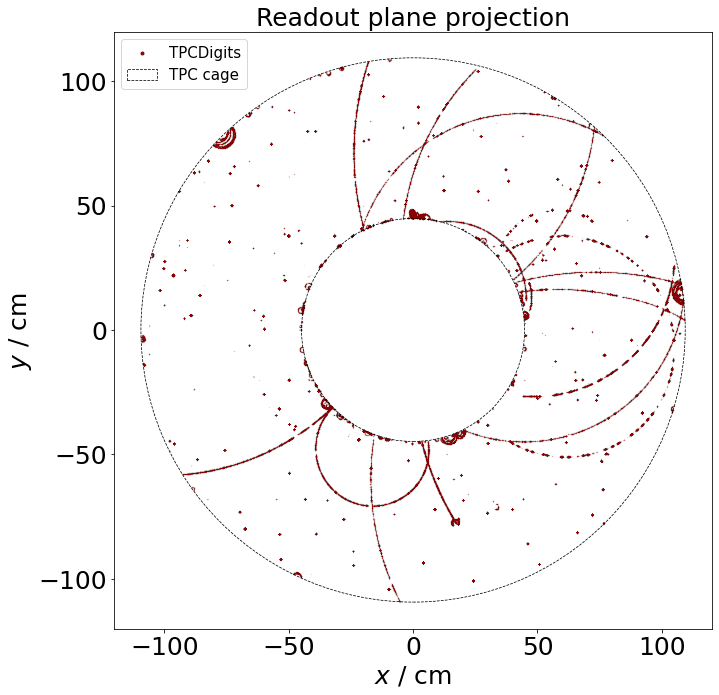

In [13]:
plot_xyprojection(TPCDigits['m_xReal'], TPCDigits['m_yReal'], hitcolor='darkred', hitlabel='TPCDigits', savebool=False, savename='UpsisForPeter.pdf')

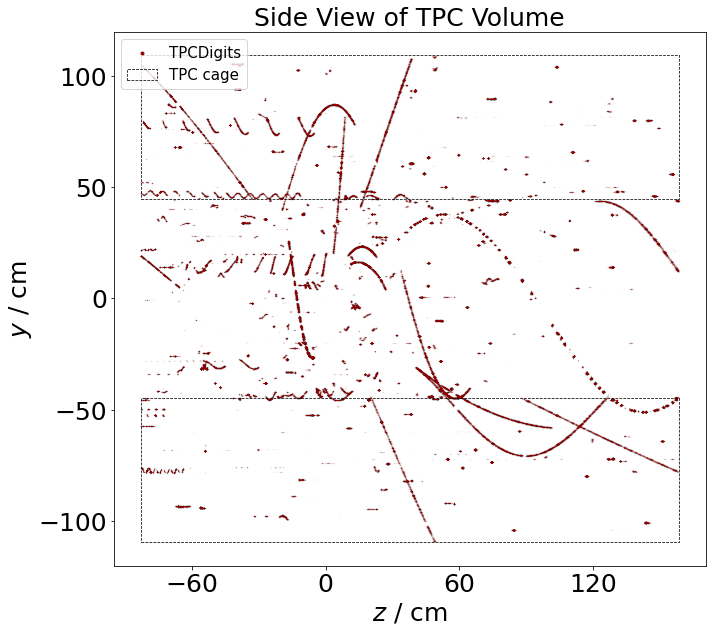

In [14]:
plot_sideprojection(TPCDigits['m_zReal'], TPCDigits['m_yReal'], 'y', hitcolor='darkred', hitlabel='TPCDigits', savebool=False, savename='UpsisForPeter_sideview.pdf')

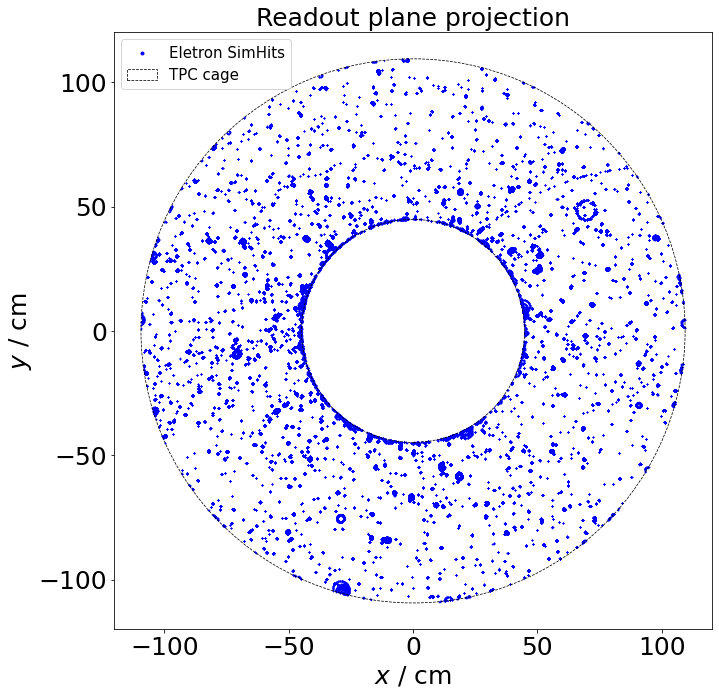

In [81]:
plot_xyprojection(TPCElectronSimHits['m_x'], TPCElectronSimHits['m_y'], hitcolor='blue', hitlabel='Eletron SimHits', hitsize=0.1, savebool=False, savename='corkscrew_RecoDigit.pdf')

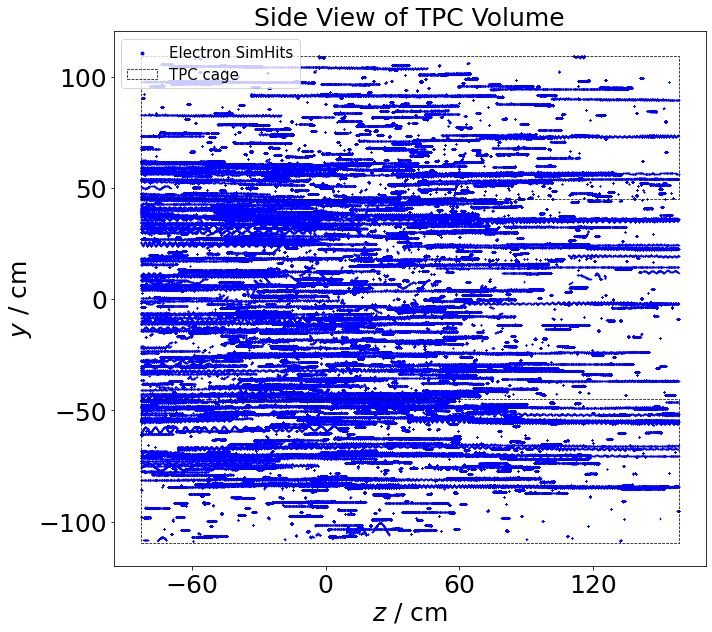

In [82]:
plot_sideprojection(TPCElectronSimHits['m_z'], TPCElectronSimHits['m_y'], 'y', hitcolor='blue', hitsize=0.1, hitlabel='Electron SimHits')

In [17]:
def plot_bkgrejection(xdata, ydata, cellIDs, hitcolor, hitlabel, hitsize=0.001, savebool=False, savename='projectionplot.pdf', xlimlow=-128.0, xlimup=128.0, ylimlow=-128.0, ylimup=128.0):
    fig, ax = plt.subplots()
    x = xdata
    y = ydata    
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75)
    
    for i in range(-128,128):
        ax.axhline(i*2, lw=0.5, color='grey')
        ax.axvline(i*2, lw=0.5, color='grey')
        
    for j in cellIDs:
        rect = plt.Rectangle(((j%128)*2-128, int(j/128)*2-128), 2, 2 ,linewidth=0.001,edgecolor='none',facecolor='darkred', alpha=0.5, ls='--', label='Rejected Cells')
        rejects = ax.add_artist(rect)

    #rect1 = plt.Rectangle(((16383%128)*2-128, int(16383/128)*2-128), 2, 2, linewidth=0.001, edgecolor='none', facecolor='darkred', alpha=0.5)
    #ax.add_artist(rect1)
    
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$x$ / cm', fontsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$y$ / cm', fontsize=30)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if xlimlow and xlimup:
        ax.set_xlim(xlimlow, xlimup)
    if ylimlow and ylimup:
        ax.set_ylim(ylimlow, ylimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=30)
    
    tpccircle = ax.add_artist(circle1)
    ax.add_artist(circle2)
    
    fig.set_size_inches(12.8, 12.8)
    plt.title('Rejection of corkscrew/background hits', fontsize=30)
    lgnd = plt.legend(handles=[tpchits, tpccircle, rejects],loc=2, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

UnboundLocalError: local variable 'rejects' referenced before assignment

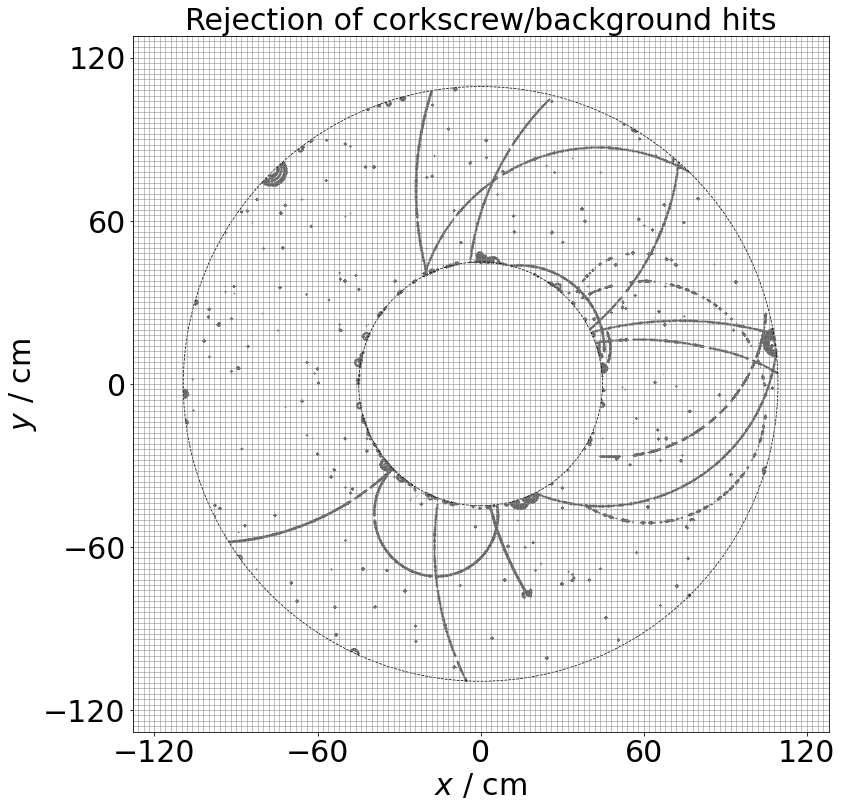

In [18]:
counts = (TPCDigits['cellID'].value_counts())
rejects = counts.index[counts > 5000].tolist()


plot_bkgrejection(TPCDigits['m_xReal'], TPCDigits['m_yReal'], rejects, hitcolor='dimgrey', hitlabel='TPCDigits', hitsize=0.1, savebool=False, savename='corkscrew_rejection.pdf')#, xlimlow=-65, xlimup=-61, ylimlow=35, ylimup=39)

In [ ]:
def plot_sidebkgrejection(zdata, sidedata, cellIDs, sidename, hitcolor, hitlabel, hitsize=0.001, savebool=False, savename='projectionplot.pdf', zlimlow=0.0, zlimup=0.0, sidelimlow=-128.0, sidelimup=128.0):
    fig, ax = plt.subplots()
    x = zdata
    y = sidedata
    
    rect1 = plt.Rectangle((-83.12,44.85), 241.69, 64.55 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    rect2 = plt.Rectangle((-83.12,-109.4), 241.69, 64.55 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--')
    
    #for i in range(-128,128):
     #   ax.axhline(i*2, lw=0.25, color='grey')
        
    
    for j in cellIDs:
        if sidename=='x':
            rect = plt.Rectangle((-83.12, (j%128)*2-128), 241.69, 2 ,linewidth=0.001,edgecolor='none',facecolor='darkred', alpha=0.5, ls='--', label='Rejected Cells')
        elif sidename=='y':
            rect = plt.Rectangle((-83.12, int(j/128)*2-128), 241.69, 2 ,linewidth=0.001,edgecolor='none',facecolor='darkred', alpha=0.5, ls='--', label='Rejected Cells')
        rejects = ax.add_artist(rect)
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$'+sidename+'$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if zlimlow and zlimup:
        ax.set_xlim(zlimlow, zlimup)
    if sidelimlow and sidelimup:
        ax.set_ylim(sidelimlow, sidelimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    ax.add_artist(rect2)
    
    fig.set_size_inches(10, 10)
    plt.title('Side View of TPC Volume', fontsize=25)
    lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

In [ ]:
counts = (TPCDigits['cellID'].value_counts())
rejects = counts.index[counts > 5000].tolist()


plot_sidebkgrejection(TPCDigits['m_zReal'], TPCDigits['m_xReal'], rejects, sidename='x', hitcolor='dimgrey', hitlabel='TPCDigits', hitsize=0.1, savebool=False, savename='corkscrew_Rejection_side.pdf')#, xlimlow=-65, xlimup=-61, ylimlow=35, ylimup=39)

# Reading test.root

In [ ]:
Test = root_pandas.read_root('test.root', 'tree')
Test

In [ ]:
plot_sideprojection(Test['z'], Test['y'], sidename='y', hitcolor='darkred', hitlabel='TPCDigits', savebool=False, savename='UpsisForPeter.pdf', sidelimlow=-128, sidelimup=128)

# Reading in the TPCTrackInfo

tracklength in mm

edep in MeV

momentum in MeV

In [ ]:
TPCTrackInfos = pd.DataFrame({subbranch: tree[f"TPCTrackInfos.{subbranch}"].array().content for subbranch in ["m_pdg", "m_trackid", "m_tracklength", "m_edep", "m_momentum"]})
#TPCTrackInfos[(abs(TPCTrackInfos['m_pdg'])==motherpdg)]
#TPCTrackInfos[(abs(TPCTrackInfos['m_pdg'])==2212)]
TPCTrackInfos[(abs(TPCTrackInfos['m_pdg'])==motherpdg) & ((TPCTrackInfos['m_trackid']==8) | (TPCTrackInfos['m_trackid']==7) | (TPCTrackInfos['m_trackid']==6) | (TPCTrackInfos['m_trackid']==5))]
#TPCTrackInfos
#print(TPCTrackInfos.loc[1691:1750, :])

In [ ]:
TPCMissingPionEvt = TPCTrackInfos[1692:2364]
TPCMissingPionEvt = TPCMissingPionEvt[(abs(TPCMissingPionEvt['m_pdg'])!=11)]
TPCMissingPionEvt
#TPCTrackInfos[(TPCTrackInfos['m_trackid']>10600) & (TPCTrackInfos['m_trackid']<10613) ]
#TPCTrackInfos[TPCTrackInfos['m_trackid']==10611]

In [ ]:
file = uproot.open("dataBhabha/Bhabha_seed40790.root")
tree = file["tree"]

In [ ]:
TPCSimHits = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z"]})
TPCSimHits

In [ ]:
plot_xyprojection(TPCSimHits['m_x'], TPCSimHits['m_y'], hitcolor='blue', hitlabel='TPCSimHits', savebool=False, savename='Upsilon4S_seed20393.pdf')

In [ ]:
file = uproot.open("dataBhabha/Bhabha_seed28600.root")
tree = file["tree"]
TPCSimHits = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z"]})
TPCSimHits

In [ ]:
plot_sideprojection(TPCSimHits['m_z'], TPCSimHits['m_x'], 'x', hitcolor='blue', hitlabel='TPCSimHits', savebool=False, savename='Upsilon4S_seed20393_sideview.pdf')